Bio.Structure
=======

This notebook outlines some features of the `Bio.Structure` module and acts as working documentation.

The `Bio.Structure` module provides functionality to read Protein Data Bank (PDB) files and do useful things with protein structures.

Basics
------

To download a Protein Data Bank (PDB) file:

In [1]:
using Bio.Structure
downloadpdb("1EN2")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  107k    0  107k    0     0   113k      0 --:--:-- --:--:-- --:--:--  113k


"1EN2.pdb"

To parse a PDB file into a Structure-Model-Chain-Residue-Atom framework:

In [2]:
struc = read("1EN2.pdb", PDB)

Name                        -  1EN2.pdb
Number of models            -  1
Chain(s)                    -  A
Number of residues          -  85
Number of point mutations   -  5
Number of other molecules   -  5
Number of water molecules   -  76
Number of atoms             -  614
Number of hydrogens         -  0
Number of disordered atoms  -  27


The elements of `struc` can be accessed as follows:

In [3]:
struc[1]                  # Model 1
struc[1]['A']             # Model 1, chain A
struc['A']                # A shortcut to the lowest model (model 1), chain A
struc['A']["50"]          # Model 1, chain A, residue 50
struc['A'][50]            # A shortcut to Model 1, chain A, residue 50 if it is not
                          #     a hetero residue and the insertion code is blank
struc['A']["H_90"]        # Model 1, chain A, hetero residue 215
struc['A'][50]["CA"]      # Model 1, chain A, residue 50, atom name CA
struc['A'][15]["CG"]['A'] # For disordered atoms, access a specific location

ATOM    101  CG ALEU A  15       0.485   1.257  26.672   0.5 18.92           C  


Disordered atoms are stored in a `DisorderedAtom` container but calls fall back to the default atom, so disorder can be ignored if you are not interested in it.

Disordered residues (i.e. point mutations with different residue names) are stored in a `DisorderedResidue` container.

The idea is that disorder will only bother you if you want it to. See the [Biopython discussion](http://biopython.org/wiki/The_Biopython_Structural_Bioinformatics_FAQ#How_is_disorder_handled.3F) for more:

Properties can be retrieved as follows:

In [4]:
structurename(struc)
modelnumbers(struc)

model = struc[1]
modelnumber(model)
chainids(model)

chain = struc['A']
chainid(chain)
resids(chain)

res = struc['A'][50]
resname(res)
chainid(res)
resnumber(res)
inscode(res)
ishetres(res)    # True if the residue consists of hetatoms
atomnames(res)

atom = struc['A'][50]["CA"]
ishetatom(atom)
serial(atom)
atomname(atom)
altlocid(atom)
resname(atom)
chainid(atom)
resnumber(atom)
inscode(atom)
x(atom)
y(atom)
z(atom)
coords(atom)
occupancy(atom)
tempfac(atom)
element(atom)
charge(atom)

""

You can loop over elements to reveal the sub-elements in the correct order:

In [5]:
for model in struc
    for chain in model
        for res in chain
            for atom in res
                # Do something
            end
        end
    end
end

`collect`, `collectresidues` and `collectatoms` can be used to get lists of sub-elements.

Selectors are functions passed as additional arguments to the `collectresidues` and `collectatoms`. Only residues/atoms that return `true` when passed to the selector are retained.

In [6]:
collect(struc['A'][50])  # Collect all the sub-elements of an element, e.g. collect atoms from a residue
collectresidues(struc)   # Collect all the residues in the structure
collectatoms(struc)      # Collect all the atoms in the structure
collectatoms(struc, calphaselector)    # Collect all C-alpha atoms in the structure
collectatoms(struc, calphaselector, disorderselector)    # Collect all disordered C-alpha atoms in the structure

2-element Array{Bio.Structure.AbstractAtom,1}:
 ATOM    109  CA AARG A  16        4.28   3.162  22.014  0.22 13.26           C  
ATOM    110  CA BARG A  16        4.28   3.162  22.014  0.22 13.26           C  

 ATOM    611  CA AGLY A  79       9.821 -11.505  25.585  0.56 32.16           C  
ATOM    612  CA BGLY A  79      10.123 -11.952  25.726  0.44 32.77           C  


It is easy to define your own selector:

In [7]:
xselector(atom::AbstractAtom) = x(atom) < 0
collectatoms(struc, xselector)    # Collect all atoms with x coordinate less than 0

137-element Array{Bio.Structure.AbstractAtom,1}:
 ATOM      9  N   ARG A   2      -2.607   4.673  13.504   1.0 20.57           N  
 ATOM     10  CA  ARG A   2      -3.091    6.01  13.918   1.0 20.82           C  
 ATOM     11  C   ARG A   2      -3.361   6.101  15.403   1.0 19.55           C  
 ATOM     12  O   ARG A   2      -3.742   5.121   16.05   1.0 19.99           O  
 ATOM     13  CB  ARG A   2      -4.348   6.395  13.124   1.0  25.3           C  
 ATOM     14  CG  ARG A   2       -4.11   6.337  11.619   1.0 30.98           C  
 ATOM     15  CD  ARG A   2      -4.277   7.652  10.942   1.0 31.79           C  
 ATOM     16  NE  ARG A   2      -3.441    8.73  11.457   1.0 31.91           N  
 ATOM     17  CZ  ARG A   2       -3.55   9.979   10.98   1.0 31.95           C  
 ATOM     18  NH1 ARG A   2      -4.444  10.212  10.022   1.0 33.34           N  
 ATOM     19  NH2 ARG A   2      -2.804  10.949  11.444   1.0 29.59           N  
 ATOM     20  N   CYS A   3      -3.248   7.317  

`organise`, `organisemodel` and `organisestruc` can be used to organise sub-elements into elements:

In [8]:
organise(collectatoms(struc))      # Organise an atom list into a residue list
organise(collectresidues(struc))   # Organise a residue list into a chain list
organise(struc['A'])               # Organise chain(s) into a model
organise(struc[1])                 # Organise model(s) into a structure
organisemodel(collectatoms(struc)) # Organise an atom list into a model
organisestructure(collectatoms(struc)) # Organise an atom list into a structure

Name                        -  
Number of models            -  1
Chain(s)                    -  A
Number of residues          -  85
Number of point mutations   -  0
Number of other molecules   -  5
Number of water molecules   -  76
Number of atoms             -  614
Number of hydrogens         -  0
Number of disordered atoms  -  27


PDB format files can be written:

In [9]:
writepdb("1EN2_out.pdb", struc)

Distances can be calculated:

In [10]:
distance(struc['A'][10], struc['A'][20]) # Minimum distance between residue 10 and 20

10.782158874733762

RMSDs/displacements between elements of the same size can also be calculated.

Examples
--------

A few examples of `Bio.Structure` usage are given below.

**A)** If you have `Gadfly` installed you can plot the temperature factors of a protein:

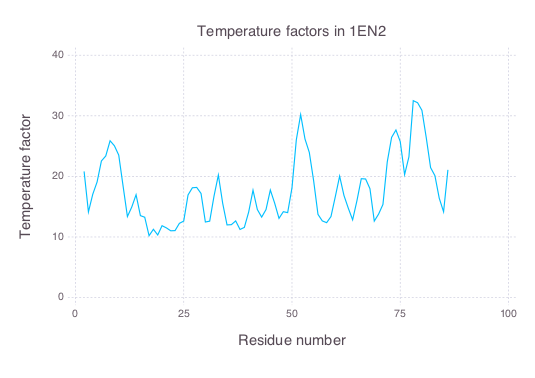

In [11]:
using Gadfly
atoms = collectatoms(struc, calphaselector)
res_nos = map(resnumber, atoms)
temp_facs = map(tempfac, atoms)
plot(
    x=res_nos,
    y=temp_facs,
    Geom.line,
    Guide.title("Temperature factors in 1EN2"),
    Guide.xlabel("Residue number"),
    Guide.ylabel("Temperature factor")
)

**B)** To find all C-alpha atoms within 5 Angstroms of residue 38:

In [12]:
for atom in atoms
    if distance(struc['A'][38], atom) < 5.0 && resnumber(atom) != 38
        show(atom)
    end
end

ATOM    144

**C)** To calculate the RMSD and displacements between the heavy (non-hydrogen) atoms of two models in an NMR structure:

In [13]:
downloadpdb("1SSU")
struc_nmr = read("1SSU.pdb", PDB)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                    

  CA  CYS A  17       4.659     6.9  21.426   1.0 10.21           C  
ATOM    302  CA  ASN A  37       1.497  10.964  24.209   1.0 12.65           C  
ATOM    319  CA  CYS A  39       6.632  10.077  25.433   1.0 11.58           C  
ATOM    436  CA  ASN A  55       0.391   2.709  32.223   1.0 19.27           C  
ATOM    444  CA  PRO A  56       2.969   5.491  31.927   1.0 13.73           C  
ATOM    451  CA  PRO A  57       5.722   5.426  29.322   1.0 12.65           C  


             Dload  Upload   Total   Spent    Left  Speed
100 1225k    0 1225k    0     0  1299k      0 --:--:-- --:--:-- --:--

Name                        -  1SSU.pdb
Number of models            -  20
Chain(s)                    -  A
Number of residues          -  51
Number of point mutations   -  0
Number of other molecules   -  0
Number of water molecules   -  0
Number of atoms             -  756
Number of hydrogens         -  357
Number of disordered atoms  -  0


:-- 1299k


In [14]:
rmsd(struc_nmr[5], struc_nmr[10], heavyatomselector)

5.098266915959375

In [15]:
displacements(struc_nmr[5], struc_nmr[10], heavyatomselector)

399-element Array{Float64,1}:
  4.62689
  4.89867
  4.34282
  4.13707
  5.54691
  7.544  
  9.09479
  7.90516
  4.27016
  3.61317
  3.01024
  2.76931
  3.37809
  ⋮      
  9.75825
  8.88036
  9.1785 
  9.55888
  9.6525 
 11.3331 
 11.3275 
  9.67149
  8.70369
  9.11419
  8.66483
 12.919  